IMPORT LIBRARY

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

DATA PREPROCESSING

In [318]:
df = pd.read_csv('../Cordova-ML/dataset/heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [319]:
df = df.rename(columns={'Patient ID' : 'patient_id', 
                        'Age' : 'age',
                        'Sex' : 'sex',
                        'Blood Pressure' : 'blood_pressure',
                        'Cholesterol' : 'cholesterol',
                        'Heart Rate' : 'heart_rate',
                        'Diabetes' : 'diabetes',
                        'Family History' : 'family_history',
                        'Smoking' : 'smoking',
                        'Obesity' : 'obesity',
                        'Alcohol Consumption' : 'alcohol_consumption',
                        'Exercise Hours Per Week' : 'exercise_hours_per_week',
                        'Diet' : 'diet',
                        'Previous Heart Problems' : 'previous_heart_problems',
                        'Medication Use' : 'medication_use',
                        'Stress Level' : 'stress_level',
                        'Sedentary Hours Per Day' : 'sedentary_hours_per_day',
                        'BMI' : 'bmi',
                        'Triglycerides' : 'triglycerides',
                        'Physical Activity Days Per Week' : 'physical_activity_days_per_week',
                        'Sleep Hours Per Day' : 'sleep_hours_per_day',
                        'Country' : 'country',
                        'Continent' : 'continent',
                        'Hemisphere' : 'hemisphere',
                        'Income' : 'income',
                        'Heart Attack Risk' : 'heart_attack_risk'})

In [320]:
df.head()

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [321]:
df = df.drop(['patient_id', 'country', 'income'], axis=1)
df.head()

,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,medication_use,stress_level,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,continent,hemisphere,heart_attack_risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,31.251233,286,0,6,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,27.194973,235,1,7,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,28.176571,587,4,4,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,36.464704,378,3,4,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,21.809144,231,1,5,Asia,Northern Hemisphere,0


In [322]:
df.dtypes

age                                  int64
sex                                 object
cholesterol                          int64
blood_pressure                      object
heart_rate                           int64
diabetes                             int64
family_history                       int64
smoking                              int64
obesity                              int64
alcohol_consumption                  int64
exercise_hours_per_week            float64
diet                                object
previous_heart_problems              int64
medication_use                       int64
stress_level                         int64
sedentary_hours_per_day            float64
bmi                                float64
triglycerides                        int64
physical_activity_days_per_week      int64
sleep_hours_per_day                  int64
continent                           object
hemisphere                          object
heart_attack_risk                    int64
dtype: obje

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8763 non-null   int64  
 1   sex                              8763 non-null   object 
 2   cholesterol                      8763 non-null   int64  
 3   blood_pressure                   8763 non-null   object 
 4   heart_rate                       8763 non-null   int64  
 5   diabetes                         8763 non-null   int64  
 6   family_history                   8763 non-null   int64  
 7   smoking                          8763 non-null   int64  
 8   obesity                          8763 non-null   int64  
 9   alcohol_consumption              8763 non-null   int64  
 10  exercise_hours_per_week          8763 non-null   float64
 11  diet                             8763 non-null   object 
 12  previous_heart_probl

In [324]:
df[['bp_systolic', 'bp_diastolic']] = df['blood_pressure'].str.split('/', expand=True)

df['bp_systolic'] = pd.to_numeric(df['bp_systolic'])
df['bp_diastolic'] = pd.to_numeric(df['bp_diastolic'])

df = df.drop(['blood_pressure'], axis=1)

In [325]:
df.head()

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,sedentary_hours_per_day,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,continent,hemisphere,heart_attack_risk,bp_systolic,bp_diastolic
0,67,Male,208,72,0,0,1,0,0,4.168189,...,6.615001,31.251233,286,0,6,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,4.963459,27.194973,235,1,7,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,9.463426,28.176571,587,4,4,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,7.648981,36.464704,378,3,4,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,1.514821,21.809144,231,1,5,Asia,Northern Hemisphere,0,91,88


In [326]:
df=df.drop_duplicates()

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8763 non-null   int64  
 1   sex                              8763 non-null   object 
 2   cholesterol                      8763 non-null   int64  
 3   heart_rate                       8763 non-null   int64  
 4   diabetes                         8763 non-null   int64  
 5   family_history                   8763 non-null   int64  
 6   smoking                          8763 non-null   int64  
 7   obesity                          8763 non-null   int64  
 8   alcohol_consumption              8763 non-null   int64  
 9   exercise_hours_per_week          8763 non-null   float64
 10  diet                             8763 non-null   object 
 11  previous_heart_problems          8763 non-null   int64  
 12  medication_use      

In [328]:
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
age                                               0                              0.00
sex                                               0                              0.00
cholesterol                                       0                              0.00
heart_rate                                        0                              0.00
diabetes                                          0                              0.00
family_history                                    0                              0.00
smoking                                           0                              0.00
obesity                                           0                              0.00
alcohol_consumption                               0                              0.00
exercise_hours_per_week                           0                              0.00
diet                                              0                              0.0

In [329]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

object_columns = ['sex', 'diet', 'continent', 'hemisphere'] 

for col in df[object_columns]:
    enc = label_encoder.fit(df[col])
    encoded = label_encoder.transform(df[col])
    df[col] = encoded
    print(enc.classes_)
    print(enc.transform(enc.classes_))
    

['Female' 'Male']
[0 1]
['Average' 'Healthy' 'Unhealthy']
[0 1 2]
['Africa' 'Asia' 'Australia' 'Europe' 'North America' 'South America']
[0 1 2 3 4 5]
['Northern Hemisphere' 'Southern Hemisphere']
[0 1]


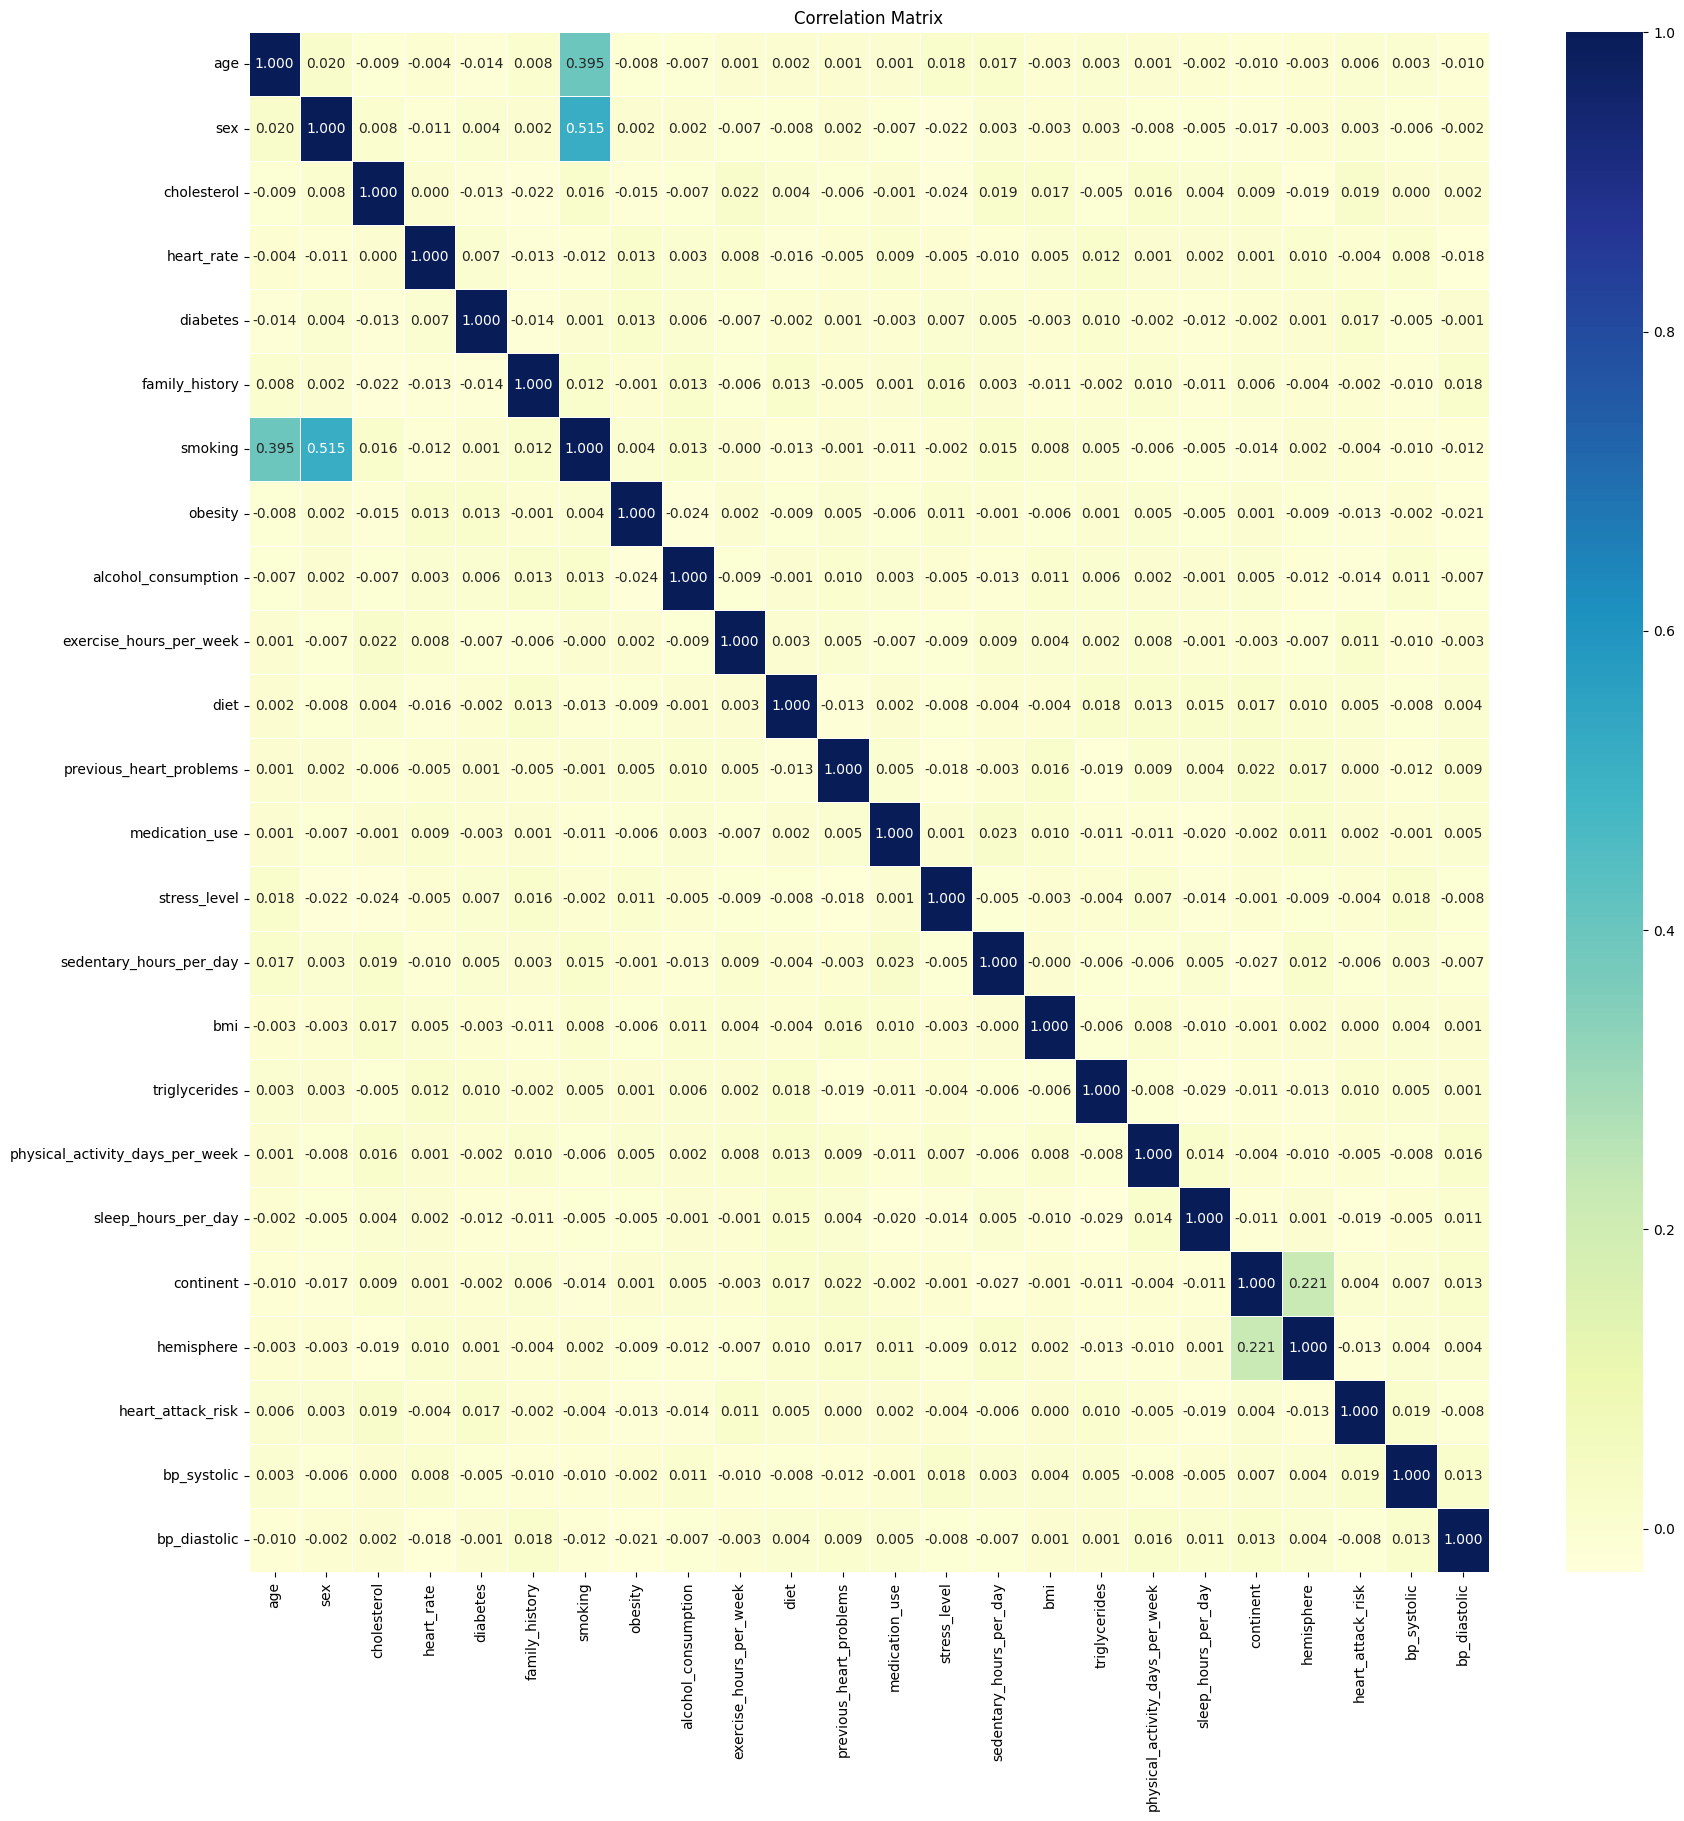

In [330]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<Axes: xlabel='heart_attack_risk', ylabel='count'>

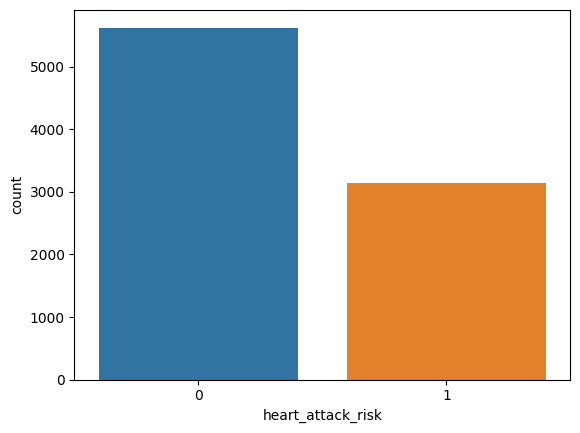

In [331]:
sns.countplot(x="heart_attack_risk", data=df)

COMPARE MODEL

In [332]:
X=df.drop('heart_attack_risk',axis=1)
y=df['heart_attack_risk']

In [333]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_resample, y_resample = smote.fit_resample(X, y)

In [334]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resample,test_size=0.2,random_state=0)

In [336]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [337]:
rf_predictions = rf_regressor.predict(X_test)
print(rf_predictions)

[0.52 0.38 0.45 ... 0.33 0.41 0.33]


In [338]:
from sklearn.metrics import accuracy_score

rfr_accuracy = accuracy_score(y_test, rf_predictions.round())

print(f"Accuracy Score: {rfr_accuracy}")

Accuracy Score: 0.6822222222222222


In [339]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [340]:
gb_predictions = gb_regressor.predict(X_test)
print(gb_predictions)

[0.41997025 0.40341027 0.49412033 ... 0.35241508 0.49166077 0.4728303 ]


In [341]:
from sklearn.metrics import accuracy_score

gb_accuracy = accuracy_score(y_test, gb_predictions.round())

print(f"Accuracy Score: {gb_accuracy}")

Accuracy Score: 0.6373333333333333


In [342]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

base_regressor = DecisionTreeRegressor()
b_regressor = BaggingRegressor(base_regressor, n_estimators=100, random_state=42)
b_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

In [343]:
b_predictions = b_regressor.predict(X_test)
print(b_predictions)

[0.53 0.41 0.43 ... 0.34 0.38 0.37]


In [344]:
from sklearn.metrics import accuracy_score

b_accuracy = accuracy_score(y_test, b_predictions.round())

print(f"Accuracy Score: {b_accuracy}")

Accuracy Score: 0.6737777777777778


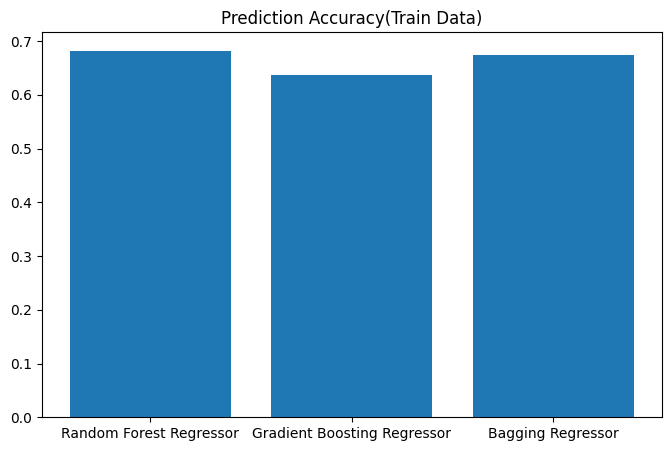

In [345]:
plt.figure(figsize=(8,5))

labels = ["Random Forest Regressor", "Gradient Boosting Regressor", "Bagging Regressor"]
values = [rfr_accuracy, gb_accuracy, b_accuracy]

plt.bar(x = labels, height = values)
plt.title("Prediction Accuracy(Train Data)")
plt.show()

TRAINING MODEL

In [346]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [350]:
import pickle
print(pickle.format_version)

with open('trained_model_rfr.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

4.0


In [348]:
data = pd.DataFrame({
    'age': [25],
    'sex': [1],
    'cholesterol': [180],
    'heart_rate': [75],
    'diabetes': [0],
    'family_history': [1],
    'smoking': [0],
    'obesity': [0],
    'alcohol_consumption': [1],
    'exercise_hours_per_week': [3.5],
    'diet': [0],
    'previous_heart_problems': [0],
    'medication_use': [0],
    'stress_level': [2],
    'sedentary_hours_per_day': [8.0],
    'bmi': [22.5],
    'triglycerides': [150],
    'physical_activity_days_per_week': [4],
    'sleep_hours_per_day': [7],
    'continent': [1],
    'hemisphere': [1],
    'bp_systolic' : [120],
    'bp_diastolic' : [80]
})


with open('trained_model_rfr.pkl', 'rb') as model_file:
    model = pickle.load(model_file)


predictions = model.predict(data.to_numpy())
print(predictions)

[0.64]
